In [3]:
import numpy as np
from get_data import data, raw_data
#Paso Inicial: Inicializo valores
k = 5 # Revisar
p = len(raw_data)
labels = raw_data.columns[1:]
countries = raw_data.values[:,0]
n = data.shape[1]

def set_init_weights():
  w = []
  for _ in range(0,p):
    wi = np.random.rand(n)
    w.append(wi)
  return np.array(w)

def update_neighborhood_weight(radius, w_k):
  #neu - neuk ?
  umbral = np.sum(data[w_k])
  res = []
  for i in range(len(data)):
    if np.abs(np.sum(data[i]) - umbral) < radius:
      res.append(i)
  return np.array(res)

init_learn_rate = 0.5
init_radius = np.sqrt(2)
max_epochs = 100
# def kohonen(init_radius = np.sqrt(2), init_learn_rate = 0.5, max_epochs = 100):
  #Paso Inicial
weights = set_init_weights()
radius = init_radius
learn_rate = init_learn_rate
t = 1
cut = False
#Paso t
while t < max_epochs and not cut:
  #Paso 1: Selecciono un registro de entrada Xp
  x_index = np.random.choice(range(data.shape[0]))
  x = data[x_index]
  #Paso 2: Encontrar la neurona ganadora
  # Xp se refiere a todo el conjunto o a un registro elegido de Xp?
  aux = []
  for w in weights:
    aux.append(np.sum(np.abs(data - w))) # PREGUNTAR si data o x
  aux = np.array(aux)
  w_k = np.argmin(aux)
  #Paso 3: Actualizar los pesos de las neuronas vecinas
  n_k = update_neighborhood_weight(radius,w_k)
  for j in range(len(weights)):
    if (j in n_k):
      weights[j] = weights[j] + learn_rate * (data[j]-weights[j])
  t += 1
  
    
#kohonen()

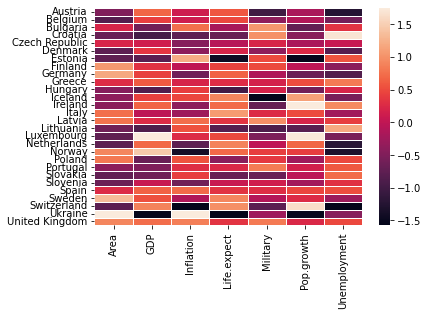

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt


ax = sns.heatmap(weights, linewidth=1, cbar=True, robust=True, yticklabels=countries, xticklabels=labels)
plt.show()